In [149]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [150]:
from proj1_helpers import *
from helpers import *

DATA_TRAIN_PATH = '../train_sel.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
y[y==-1]=0

In [151]:
ys, tXs = y, tX

In [152]:
#Optional: normalize rows
#row_sums = tXs.max(axis=1)
#tXs = tXs / row_sums[:, np.newaxis]

In [153]:
tXs,_,_= standardize(tXs)

In [154]:
tXs.shape

(250000, 35)

In [155]:
ys.shape

(250000,)

In [156]:
ys

array([ 1.,  0.,  0., ...,  1.,  0.,  0.])

In [157]:
tXs

array([[ 1.        ,  0.34152231,  0.06833197, ...,  0.20772756,
         0.77194154, -0.96374121],
       [ 1.        ,  0.76655782,  0.55250482, ..., -0.25832795,
         0.84884455, -0.21344514],
       [ 1.        , -0.15156202,  3.19515553, ..., -0.25832795,
         0.84884455, -0.21344514],
       ..., 
       [ 1.        , -0.28302468,  0.31931645, ..., -0.25832795,
        -1.76560715, -0.21344514],
       [ 1.        , -0.48177944, -0.84532397, ..., -0.25832795,
         0.84884455, -0.21344514],
       [ 1.        , -0.15156202,  0.66533608, ..., -0.25832795,
         0.83595897, -0.21344514]])

# Crazy Machine Learning

## Baselines (all methods should get similar estimates of w and mse)

## Fit with Least squares

In [65]:
from least_squares import least_squares
from least_squares import least_squares_GD_auto, least_squares_SGD_simple
max_iters = 1000
batch_size = 100
w0 = np.zeros(tXs.shape[1])
gamma = 0.1

ls_mse, w_ls = least_squares(ys, tXs)
gdls_mse, w_gdls = least_squares_GD_auto(ys, tXs, max_iters, w0)
sgdls_mse, w_sgdls = least_squares_SGD_simple(ys, tXs, max_iters, batch_size, w0, gamma)

KeyboardInterrupt: 

In [9]:
ls_mse, w_ls

(0.08486139962233244,
 array([  3.42668000e-01,   1.46894135e-02,  -1.26265738e-01,
         -1.27395562e-01,  -1.51848412e-02,  -7.00723588e-01,
          1.47850821e-01,  -5.39447357e+00,   1.33940431e-01,
         -1.22467489e-03,  -1.64408736e+02,  -9.13239441e-02,
          5.70198133e-02,   1.02522980e+01,   3.19416930e+01,
         -1.59480956e-04,  -9.04421480e-04,   3.14962841e+01,
         -2.24320729e-04,   7.71896441e-04,   6.07313503e-02,
          1.97634414e-04,  -3.16611736e-02,  -1.03373547e-01,
         -5.83278849e-02,   4.93128226e-02,   8.39538546e-02,
         -1.67573128e-02,  -1.49179344e+00,  -2.68194046e+00,
          1.39235199e+02]))

In [10]:
gdls_mse, w_gdls

(0.085006007482485935,
 array([  3.42668000e-01,   1.45632449e-02,  -1.26738913e-01,
         -1.27530067e-01,  -1.54917793e-02,  -1.20909570e-02,
          2.09016254e-01,  -1.98401722e-02,   1.33953007e-01,
         -1.00754405e-03,  -4.04023001e-04,  -9.13110485e-02,
          5.75444913e-02,  -1.36777979e-02,   9.62282138e-02,
         -3.20291370e-04,  -5.34745366e-04,   1.44148765e-01,
         -4.47812519e-04,   1.27149540e-03,   6.05219879e-02,
          5.17684433e-04,  -3.15704551e-02,  -9.37837120e-02,
          2.22635189e-02,   2.76892737e-02,   2.76875391e-02,
         -1.42745900e-02,  -1.48432129e-02,  -1.51770128e-02,
         -5.49301899e-02]))

In [11]:
sgdls_mse, w_sgdls

(0.086670130876927653,
 array([ 0.34254363,  0.00679056, -0.12437178, -0.12596976, -0.03086418,
        -0.02350184,  0.20678933, -0.03220147,  0.1248132 , -0.01175256,
        -0.00063586, -0.07818721,  0.07096755, -0.02526131,  0.10278411,
        -0.00949337, -0.00084807,  0.13710221,  0.00447407,  0.00878808,
         0.04379585,  0.01167051, -0.0393092 , -0.09340691,  0.02852881,
         0.03260432,  0.03215285, -0.02855735, -0.02622768, -0.02656874,
        -0.05511662]))

## Ridge regression

In [158]:
from ridge_regression import ridge_regression, ridge_regression_auto

lambdas = np.logspace(-4, 2, 10)
kfold=4

ridge_mse, w_ridge = ridge_regression(ys, tXs, 0.5)
ridge_kfold_mse, w_ridge_kfold = ridge_regression_auto(ys, tXs, kfold, lambdas)

In [159]:
ridge_mse, w_ridge

(0.084553111693793759,
 array([  3.42667315e-01,   5.53958964e-03,  -1.24810348e-01,
         -1.27397204e-01,   1.79716024e-02,  -3.62420960e-03,
          6.99700391e-02,  -4.81147498e-03,   1.35278106e-01,
         -1.32915778e-02,   2.58387140e-02,  -9.26431107e-02,
          6.06772519e-02,  -2.98026172e-02,   8.49865086e-02,
         -4.60333454e-04,  -3.73881619e-04,   1.35192681e-01,
         -9.28163712e-05,   1.32427309e-03,   4.66288778e-02,
          4.97528180e-04,  -2.35396161e-02,  -1.64149890e-02,
         -3.76515258e-02,   1.89126471e-04,   2.09990537e-04,
         -1.16501288e-02,   8.28816900e-04,  -8.05755532e-04,
         -1.75533628e-02,  -3.37552084e-02,   2.36712254e-02,
          8.22593077e-03,   7.33568213e-02]))

In [160]:
ridge_kfold_mse, w_ridge_kfold

(0.084697814474257047,
 array([  3.42236835e-01,   6.25105217e-03,  -1.22973952e-01,
         -1.27030409e-01,   1.94331010e-02,  -1.42100486e-03,
          6.89876039e-02,  -2.58640479e-03,   1.35158782e-01,
         -1.34082932e-02,   2.40929587e-02,  -9.08680399e-02,
          6.17703632e-02,  -2.85624395e-02,   8.53282232e-02,
         -4.09185993e-04,  -3.96679972e-04,   1.32323450e-01,
          1.67007876e-04,   1.01773699e-03,   4.46570363e-02,
          2.34162108e-04,  -2.35267193e-02,  -1.33132226e-02,
         -3.49518065e-02,   1.02242147e-05,   4.06751375e-04,
         -1.03255382e-02,   5.98275299e-04,  -1.27334526e-03,
         -2.08427008e-02,  -3.14953185e-02,   2.24863244e-02,
          8.08909885e-03,   7.20928952e-02]))

## Logistic regression

In [161]:
from logistic_regression import logistic_regression, reg_logistic_regression

#NOTE: loss here is different (includes log terms) so it will differ from mse above

gamma=0.1
max_iters = 1000
lambda_= 0.1

#IMPORTANT: it is probably better to use ONLY the regularized version of log_regression for this
#dataset as the Newton method depends on the hessian being non-singular (which is guaranteed by lambda_>0)
lreg_reg_loss, w_lreg_reg = reg_logistic_regression(ys, tXs, lambda_, gamma, max_iters)

In [162]:
lreg_reg_loss, w_lreg_reg

(124181.98806164358,
 array([ -8.86689205e-01,   1.05933604e-01,  -6.74782212e-01,
         -1.13761571e+00,   4.43185694e-01,  -5.83966396e-02,
          3.13519355e-01,  -3.76775466e-02,   1.05968305e+00,
         -9.27606048e-02,   1.38781737e-01,  -7.88433813e-01,
          2.49419507e-01,  -1.20364302e-01,   4.67756597e-01,
         -3.15705125e-03,  -1.60933751e-03,   9.97281624e-01,
         -8.37210082e-04,   7.22597546e-03,   1.00632360e-01,
          3.52828103e-04,  -1.35729232e-01,  -8.20909985e-02,
         -2.19046670e-01,   2.35058596e-04,  -6.69370532e-05,
         -8.03840491e-02,   5.93670870e-03,  -3.43561431e-03,
         -1.65809832e-01,   1.87174779e-02,   1.59182110e-01,
          4.70552227e-02,   3.63403732e-01]))

In [163]:
from logistic_regression import reg_logistic_regression_auto

max_iters = 1000
lambdas = np.logspace(-5, 3, 20)
kfold = 15

logreg_auto_loss, w_logreg_auto = reg_logistic_regression_auto(ys, tXs, kfold, max_iters, lambdas)

In [164]:
logreg_auto_loss, w_logreg_auto

(8317.4347677307287,
 array([ -8.87562257e-01,   1.06655146e-01,  -6.72385123e-01,
         -1.13453611e+00,   4.46857707e-01,  -4.90859739e-02,
          2.95385511e-01,  -3.21894284e-02,   1.06046864e+00,
         -9.24771935e-02,  -3.91038801e+00,  -7.96292852e-01,
          2.49222170e-01,  -1.11626336e-01,   1.24417636e+00,
         -1.89310293e-03,  -3.16226326e-03,   1.76995809e+00,
          4.04008270e-04,   7.52717765e-03,   9.45044253e-02,
         -3.11413196e-03,  -1.31674258e-01,  -7.21375346e-02,
         -2.10479631e-01,  -1.84549732e-03,  -5.56397177e-04,
         -7.56201324e-02,   6.62352895e-03,  -3.27177642e-03,
          3.24787577e+00,   4.36605390e-02,   1.54688574e-01,
          4.50082249e-02,   3.56842137e-01]))

In [165]:
weights_log = w_logreg_auto

In [166]:
weights_ls = w_ridge_kfold

In [167]:
weights_log

array([ -8.87562257e-01,   1.06655146e-01,  -6.72385123e-01,
        -1.13453611e+00,   4.46857707e-01,  -4.90859739e-02,
         2.95385511e-01,  -3.21894284e-02,   1.06046864e+00,
        -9.24771935e-02,  -3.91038801e+00,  -7.96292852e-01,
         2.49222170e-01,  -1.11626336e-01,   1.24417636e+00,
        -1.89310293e-03,  -3.16226326e-03,   1.76995809e+00,
         4.04008270e-04,   7.52717765e-03,   9.45044253e-02,
        -3.11413196e-03,  -1.31674258e-01,  -7.21375346e-02,
        -2.10479631e-01,  -1.84549732e-03,  -5.56397177e-04,
        -7.56201324e-02,   6.62352895e-03,  -3.27177642e-03,
         3.24787577e+00,   4.36605390e-02,   1.54688574e-01,
         4.50082249e-02,   3.56842137e-01])

In [168]:
weights_ls

array([  3.42236835e-01,   6.25105217e-03,  -1.22973952e-01,
        -1.27030409e-01,   1.94331010e-02,  -1.42100486e-03,
         6.89876039e-02,  -2.58640479e-03,   1.35158782e-01,
        -1.34082932e-02,   2.40929587e-02,  -9.08680399e-02,
         6.17703632e-02,  -2.85624395e-02,   8.53282232e-02,
        -4.09185993e-04,  -3.96679972e-04,   1.32323450e-01,
         1.67007876e-04,   1.01773699e-03,   4.46570363e-02,
         2.34162108e-04,  -2.35267193e-02,  -1.33132226e-02,
        -3.49518065e-02,   1.02242147e-05,   4.06751375e-04,
        -1.03255382e-02,   5.98275299e-04,  -1.27334526e-03,
        -2.08427008e-02,  -3.14953185e-02,   2.24863244e-02,
         8.08909885e-03,   7.20928952e-02])

## Generate predictions and save ouput in csv format for submission:

In [171]:
DATA_TEST_PATH = '../test_sel.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
#Optional: normalize rows
#row_sums = tX_test.max(axis=1)
#tX_test = tX_test / row_sums[:, np.newaxis]

tX_test,_,_= standardize(tX_test)

In [172]:
tX_test.shape

(568238, 35)

In [173]:
OUTPUT_PATH_LS = '../submission_ls.csv' # TODO: fill in desired name of output file for submission
OUTPUT_PATH_LOG = '../submission_log.csv'

y_pred_ls = predict_labels(weights_ls, tX_test)
y_pred_log = predict_labels_logistic(weights_log, tX_test)


In [174]:
print(y_pred_ls)
print(y_pred_log)

[-1.  1.  1. ...,  1.  1.  1.]
[-1. -1. -1. ...,  1.  1. -1.]


In [175]:
print(y_pred_ls.shape)
print(y_pred_log.shape)

(568238,)
(568238,)


In [176]:
create_csv_submission(ids_test, y_pred_ls, OUTPUT_PATH_LS)
create_csv_submission(ids_test, y_pred_log, OUTPUT_PATH_LOG)

## Boxplot

In [208]:
PATH_RAW_DATA = '../train.csv'
PATH_SEL_DATA = '../train_sel.csv'

y_raw, tX_raw, ids = load_csv_data(PATH_RAW_DATA)
y_raw[y_raw==-1]=0
tX_raw,_,_= standardize(tX_raw)

y_sel, tX_sel, ids = load_csv_data(PATH_SEL_DATA)
y_sel[y_sel==-1]=0
tX_sel,_,_= standardize(tX_sel)

In [212]:
from logistic_regression import reg_logistic_regression_auto_plot

max_iters = 1000
lambdas = np.logspace(-5, 2, 10)
kfold = 6

training_errs_raw, test_errs_raw = reg_logistic_regression_auto_plot(y_raw, tX_raw, kfold, max_iters, lambdas)
training_errs_sel, test_errs_sel = reg_logistic_regression_auto_plot(y_sel, tX_sel, kfold, max_iters, lambdas)

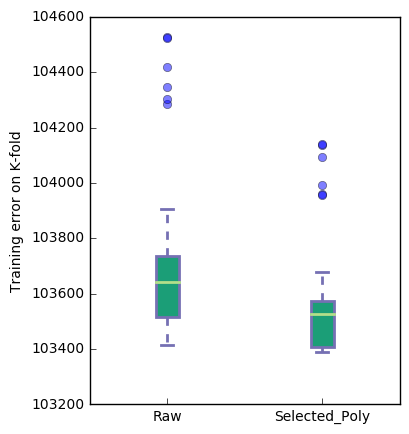

In [213]:


fig = plt.figure(1, figsize=(4, 5))

# Create an axes instance
ax = fig.add_subplot(111)
plt.ylabel('Training error on K-fold')

## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot([training_errs_raw, training_errs_sel], patch_artist=True)
ax.set_xticklabels(['Raw', 'Selected_Poly'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
fig.savefig('training_error.jpg', format='jpg',bbox_inches='tight')

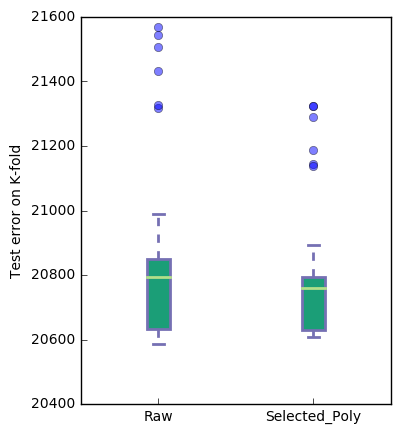

In [214]:
fig = plt.figure(1, figsize=(4, 5))

# Create an axes instance
ax = fig.add_subplot(111)
plt.ylabel('Test error on K-fold')

## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot([test_errs_raw, test_errs_sel], patch_artist=True)
ax.set_xticklabels(['Raw', 'Selected_Poly'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
fig.savefig('test_error.jpg', format='jpg',bbox_inches='tight')